In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [2]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_designed_Sei_feature_0511.csv')
MPRA_df

,ID,origin,HepG2,K562,SK-N-SH,seq,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF
0,20211207_63610__124703__1::sa__hepg2__0,Simulated_Annealing,2.196,-0.312,-0.918,TCGAAACAGGTATACCGCCAGCAATCCAATCTCTACCGGTGTACAC...,0.003,0.002,0.001,0.004,0.003,0.003,0.006,0.000,0.098,0.027,0.008,0.006,0.040,0.001,0.035,0.001,0.004,0.002,0.000,0.037,NaN,0.000,NaN,0.000
1,20211207_63610__124703__4::sa__hepg2__0,Simulated_Annealing,0.881,-1.110,-1.097,GCTAAGGTCCTTATTGAATTTTGGTTAATCATTAACTACCCGTCAT...,0.003,0.001,0.001,0.002,0.001,0.001,0.005,0.000,0.063,0.010,0.003,0.003,0.030,0.001,0.025,0.002,0.006,0.003,0.000,0.006,NaN,0.000,NaN,0.001
2,20211207_63610__124703__5::sa__hepg2__0,Simulated_Annealing,2.169,-0.545,-1.135,TGGTCCATTCCTGGGAATTTGCCGCCTGTACCTGCAAGGTTATACA...,0.005,0.004,0.002,0.002,0.005,0.001,0.012,0.000,0.052,0.046,0.017,0.002,0.042,0.001,0.031,0.002,0.004,0.006,0.001,0.009,NaN,0.000,NaN,0.000
3,20211207_63610__124703__12::sa__hepg2__0,Simulated_Annealing,2.043,-0.770,-0.703,TCGGGAGATGTCAACACCTGTTGAGCTATTATGCCCTAGCCTGGTT...,0.003,0.000,0.000,0.001,0.002,0.001,0.002,0.000,0.390,0.013,0.011,0.001,0.042,0.000,0.016,0.002,0.001,0.000,0.000,0.003,NaN,0.000,NaN,0.000
4,20211207_63610__124703__15::sa__hepg2__0,Simulated_Annealing,2.037,-0.654,-1.244,GACTTTGAACTCTGGACAGCAGAACAAATCACGGGAACCCTGTCAT...,0.008,0.001,0.001,0.002,0.003,0.001,0.008,0.000,0.185,0.020,0.015,0.002,0.066,0.001,0.022,0.005,0.001,0.000,0.000,0.010,NaN,0.000,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77149,ORF54316:2538:1300-1500,control,0.592,-0.315,0.069,CTCGGAGTTCAAGAAAATCATCTCACACGGCCGTCTCAGACCCTTC...,0.003,0.000,0.000,0.001,0.001,0.001,0.003,0.000,0.004,0.001,0.000,0.004,0.001,0.001,0.025,0.000,0.001,0.001,0.000,0.006,NaN,0.000,NaN,0.000
77150,ORF53130:1455:400-600,control,-0.360,-0.135,-0.022,GCAATCCTACCCAGACAGATGCAGACAGCGACCTGGTGGGGGATGT...,0.002,0.000,0.000,0.002,0.000,0.000,0.007,0.001,0.002,0.000,0.000,0.006,0.000,0.001,0.038,0.001,0.022,0.000,0.000,0.010,NaN,0.000,NaN,0.002
77151,ORF55877:2391:1900-2100,control,0.490,0.647,0.462,CCTATGCTGCCTCCTATGCCCTTGTCATCATTGCCATTTTTGAGCT...,0.003,0.000,0.000,0.001,0.001,0.001,0.002,0.002,0.002,0.000,0.000,0.001,0.000,0.001,0.025,0.003,0.002,0.000,0.000,0.002,NaN,0.000,NaN,0.002
77152,ORF52950:2193:400-600,control,-0.014,-0.062,0.240,AGCCACAACAAAACAGCCAGTTAATGTGGAAACAAGGTCGACAACT...,0.004,0.000,0.001,0.001,0.001,0.000,0.002,0.000,0.002,0.000,0.000,0.001,0.000,0.000,0.022,0.000,0.002,0.000,0.000,0.003,NaN,0.000,NaN,0.000


In [3]:
# seq feature
# train 3 cell types

y_pred = np.load(f'../saved/0507_GosaiMPRA_MyResTransformer3/0507_044041/Gosai_designed_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

ValueError: Length of values (760679) does not match length of index (77154)

In [20]:
# seq feature
# train 3 cell types

y_pred = np.load(f'../saved/0507_GosaiMPRA_MyResTransformer3/0507_044041/Gosai_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [21]:
# 预测值和真实值的相关性

for data_split in ['train', 'test', 'const', 'diff', 'specific', 'high']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)

train
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.898      0.865        0.869       0.872     0.870
HepG2       0.933      0.953        0.934       0.936     0.941
SK-N-SH     0.891      0.894        0.916       0.892     0.892
HCT116      0.889      0.891        0.893       0.895     0.888
A549        0.796      0.802        0.808       0.811     0.812
test
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.817      0.781        0.787       0.793     0.789
HepG2       0.834      0.851        0.832       0.836     0.842
SK-N-SH     0.800      0.796        0.821       0.797     0.795
HCT116      0.817      0.817        0.815       0.824     0.815
A549        0.710      0.710        0.717       0.727     0.729
const
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.902      0.887        0.887       0.890     0.889
HepG2       0.935      0.942        0.933       0.932     0.934
SK-N-SH     0.900      

In [22]:
# def quantile_normalize(df: pd.DataFrame) -> pd.DataFrame:
#     # 排序
#     sorted_df = pd.DataFrame(
#         np.sort(df.values, axis=0),
#         index=df.index,
#         columns=df.columns
#     )
    
#     # 计算每一行的平均（也就是所有列排序后对应rank位置的平均）
#     mean_ranks = sorted_df.mean(axis=1)
    
#     # 得到每列的排序索引
#     ranks = df.rank(method="min", axis=0).astype(int) - 1  # 0-based index
    
#     # 构建归一化后的结果矩阵
#     normed = df.copy()
#     for col in df.columns:
#         normed[col] = ranks[col].apply(lambda r: mean_ranks.iloc[r])
    
#     return normed

# cell_types = ['K562', 'HepG2', 'SK-N-SH']
# df[cell_types] = quantile_normalize(df[cell_types])

test
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.482      -0.193        -0.258        0.005     -0.053
HepG2       -0.200       0.425        -0.192        0.053      0.204
SK-N-SH     -0.309      -0.180         0.428       -0.052     -0.126
HCT116      -0.099       0.065         0.032        0.192      0.058
A549        -0.112       0.020         0.081        0.093      0.105


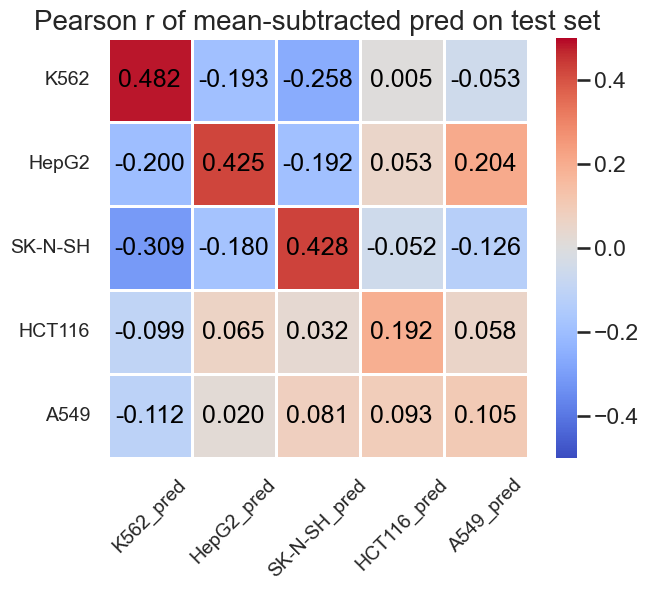

In [29]:
for data_split in ['test']:
    pearson_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            df = MPRA_df[condition]
            mean = df[['K562', 'HepG2', 'SK-N-SH']].mean(axis=1)
            x = df[f'{cell_type}'] - df[['K562', 'HepG2', 'SK-N-SH']].mean(axis=1)
            y = df[f'{cell_type_2}_pred'] - df[['K562_pred', 'HepG2_pred', 'SK-N-SH_pred']].mean(axis=1)
            r, p = pearson(x, y)
            pearson_df.loc[cell_type, f'{cell_type_2}_pred'] = r
    print(data_split)
    print(pearson_df)




plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=-0.5, vmax=0.5, 
            annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
        rotation=45, fontsize=14)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
        rotation=0, fontsize=14)
plt.title(f'Pearson r of mean-subtracted pred on test set', fontsize=20)
plt.grid(False)
plt.savefig(f'figures/Gosai_heatmap_pred-mean_{data_split}.png', dpi=400)
plt.show()

specific
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.268    0.188   0.331 0.212
HepG2   0.304  1.000    0.371   0.486 0.390
SK-N-SH 0.425  0.603    1.000   0.620 0.614
HCT116  0.388  0.547    0.425   1.000 0.723
A549    0.685  0.677    0.789   0.836 1.000


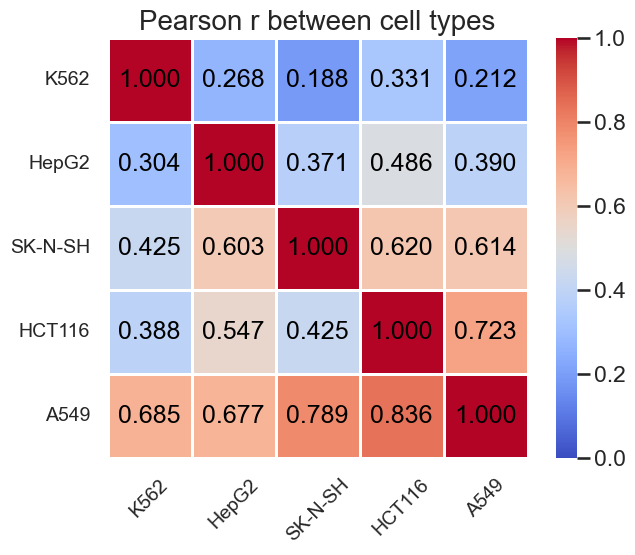

In [6]:

pearson_df = pd.DataFrame(dtype=float)
for cell_type in cell_types:
    for cell_type_2 in cell_types:
        condition_1 = data_split_dict['total']
        condition_2 = data_split_dict[f'{cell_type}_specific']
        df = MPRA_df[condition_1 & condition_2]
        x = df[f'{cell_type}']
        y = df[f'{cell_type_2}']
        r = pearson(x, y)[0]
        pearson_df.loc[cell_type, cell_type_2] = r
print('specific')
print(pearson_df)


# pearson_df = pd.DataFrame(dtype=float)
# for cell_type in cell_types:
#     for cell_type_2 in cell_types:
#         condition_1 = data_split_dict['test']
#         condition_2 = data_split_dict[f'{cell_type}_specific']
#         df = MPRA_df[condition_1 & condition_2]
#         x = df[f'{cell_type}']
#         y = df[f'{cell_type_2}']
#         r = pearson(x, y)[0]
#         pearson_df.loc[cell_type, cell_type_2] = r
# print('test+specific')
# print(pearson_df)



plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
            annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
        rotation=45, fontsize=14)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
        rotation=0, fontsize=14)
plt.title(f'Pearson r between cell types', fontsize=20)
plt.grid(False)
plt.savefig(f'figures/Gosai_heatmap_activity_pearson_{data_split}.png', dpi=400)
plt.show()

test+specific
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.577       0.384         0.411        0.424      0.411
HepG2        0.542       0.669         0.541        0.590      0.646
SK-N-SH      0.612       0.588         0.707        0.614      0.609
HCT116       0.491       0.512         0.478        0.601      0.547
A549         0.714       0.735         0.739        0.754      0.746


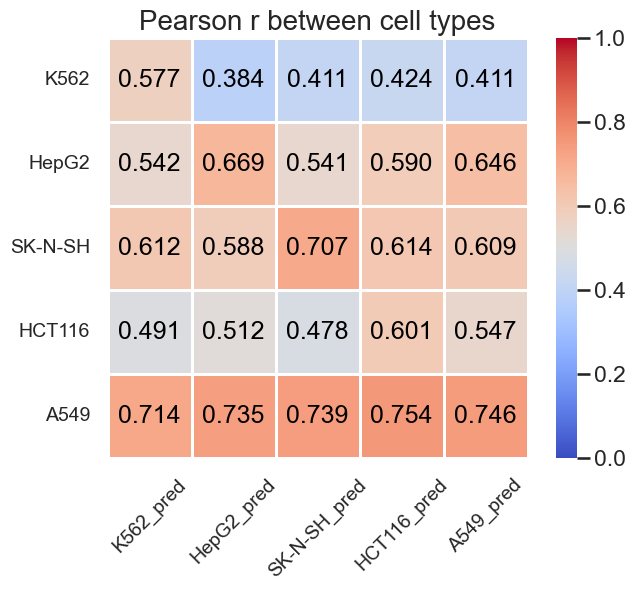

In [49]:

# pearson_df = pd.DataFrame(dtype=float)
# for cell_type in cell_types:
#     for cell_type_2 in cell_types:
#         condition_1 = data_split_dict['total']
#         condition_2 = data_split_dict[f'{cell_type}_specific']
#         df = MPRA_df[condition_1 & condition_2]
#         x = df[f'{cell_type}']
#         y = df[f'{cell_type_2}_pred']
#         r = pearson(x, y)[0]
#         pearson_df.loc[cell_type, cell_type_2] = r
# print('specific')
# print(pearson_df)


pearson_df = pd.DataFrame(dtype=float)
for cell_type in cell_types:
    for cell_type_2 in cell_types:
        condition_1 = data_split_dict['test']
        condition_2 = data_split_dict[f'{cell_type}_specific']
        df = MPRA_df[condition_1 & condition_2]
        x = df[f'{cell_type}']
        y = df[f'{cell_type_2}_pred']
        r = pearson(x, y)[0]
        pearson_df.loc[cell_type, f'{cell_type_2}_pred'] = r
print('test+specific')
print(pearson_df)



plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
            annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
        rotation=45, fontsize=14)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
        rotation=0, fontsize=14)
plt.title(f'Pearson r between cell types', fontsize=20)
plt.grid(False)
plt.savefig(f'figures/Gosai_heatmap_pred_activity_pearson_test_specific.png', dpi=400)
plt.show()

total
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.801    0.759   0.825 0.724
HepG2   0.801  1.000    0.836   0.879 0.730
SK-N-SH 0.759  0.836    1.000   0.833 0.777
HCT116  0.825  0.879    0.833   1.000 0.825
A549    0.724  0.730    0.777   0.825 1.000


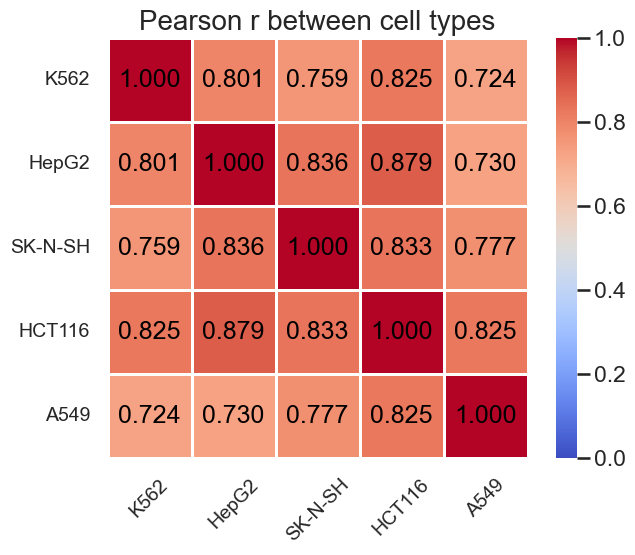

diff
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.471    0.453   0.516 0.561
HepG2   0.471  1.000    0.622   0.675 0.617
SK-N-SH 0.453  0.622    1.000   0.649 0.771
HCT116  0.516  0.675    0.649   1.000 0.821
A549    0.561  0.617    0.771   0.821 1.000


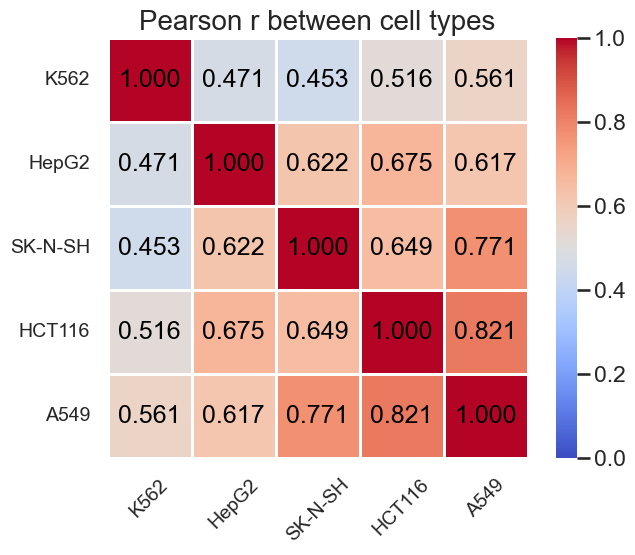

In [37]:
for data_split in ['total', 'diff']:
    pearson_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]

            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}']
            r = pearson(x, y)[0]
            pearson_df.loc[cell_type, cell_type_2] = r
    print(data_split)
    print(pearson_df)

    # pearson_df.loc['HCT116', 'A549'] = np.nan
    # pearson_df.loc['A549', 'HCT116'] = np.nan


    plt.figure(figsize=(8, 6), dpi=100)
    # plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
    sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
            rotation=45, fontsize=14)
    plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
            rotation=0, fontsize=14)
    plt.title(f'Pearson r between cell types', fontsize=20)
    plt.grid(False)
    plt.savefig(f'figures/Gosai_heatmap_activity_pearson_{data_split}.png', dpi=400)
    plt.show()

test
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.817       0.781         0.787        0.793      0.789
HepG2        0.834       0.851         0.832        0.836      0.842
SK-N-SH      0.800       0.796         0.821        0.797      0.795
HCT116       0.817       0.817         0.815        0.824      0.815
A549         0.710       0.710         0.717        0.727      0.729


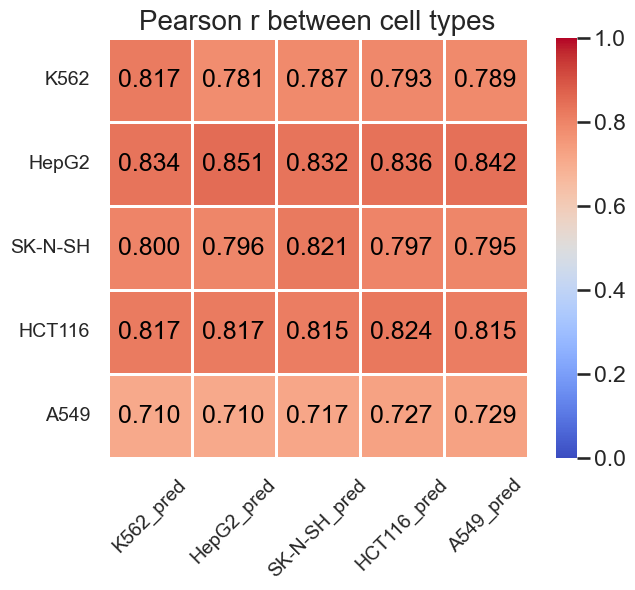

test_diff
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.708       0.570         0.611        0.608      0.592
HepG2        0.661       0.748         0.677        0.695      0.726
SK-N-SH      0.627       0.608         0.704        0.643      0.628
HCT116       0.696       0.684         0.698        0.742      0.701
A549         0.660       0.695         0.714        0.706      0.705


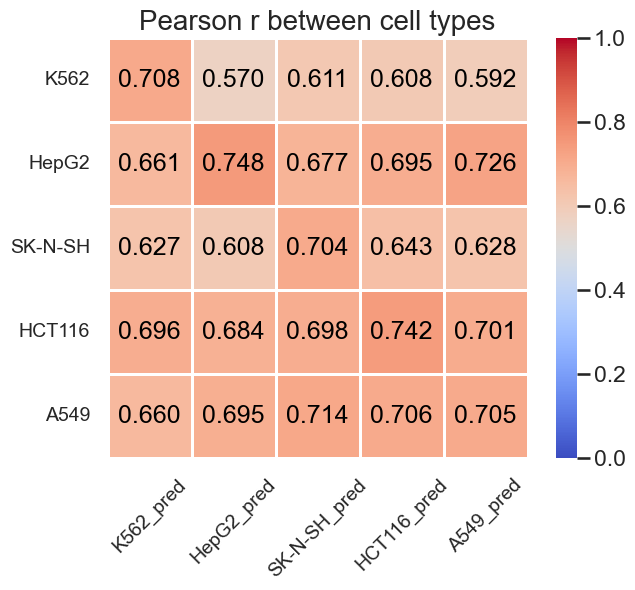

In [38]:
for data_split in ['test', 'test_diff']:
    pearson_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]

            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}_pred']
            r = pearson(x, y)[0]
            pearson_df.loc[cell_type, f'{cell_type_2}_pred'] = r
    print(data_split)
    print(pearson_df)

    # pearson_df.loc['HCT116', 'A549'] = np.nan
    # pearson_df.loc['A549', 'HCT116'] = np.nan


    plt.figure(figsize=(8, 6), dpi=100)
    #plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
    sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0.0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
            rotation=45, fontsize=14)
    plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
            rotation=0, fontsize=14)
    plt.title(f'Pearson r between cell types', fontsize=20)
    plt.grid(False)
    plt.savefig(f'figures/Gosai_heatmap_pred_activity_pearson_{data_split}.png', dpi=400)
    plt.show()